In [5]:
""" Let's first code up k = 1"""
from random import uniform
from math import log
from tqdm import tqdm
#inter-arrival times I ~ Exp(λ)
#λ, k, p_i
λ = 2
μ = 3
def gen_arrival():
    u = uniform(0,1)
    return -(1/λ)*log(u)

def gen_jobsize():
    u = uniform(0,1)
    return -(1/μ)*log(u)


''' Making transition to dropping system now: 1 server'''
def run():
    pis = [0] * 50
    t = 0
    N = 0
    t_complete = float('inf')
    t_arrive = gen_arrival()
    arrivals = 0
    t_100k = 0
    to_depart = 1
    while True:
        #job completes next
        if t_complete < t_arrive:
            t += t_complete
            pis[N] += t_complete
            N -= 1
            if t_100k:
                to_depart -= 1
            if t_100k and not to_depart:
                # print(t,max(pis))
                # print(t,sum(pis),t_100k)
                return t-t_100k,N,[pi / (t) for pi in pis]
            t_arrive -= t_complete
            t_complete = gen_jobsize() if N > 0 else float('inf')
        #job arrives next
        else:
            t += t_arrive
            pis[N] += t_arrive
            N += 1
            t_complete -= t_arrive
            if N==1 and t_complete == float('inf'):
                t_complete = gen_jobsize()
            t_arrive = gen_arrival()
            arrivals += 1
            if arrivals == 100_000:
                t_100k = t
                to_depart = N
                # print('hey',t,t_100k,N)
ts,Ns = [],[]
n = 1000
pi_true = []
for _ in tqdm(range(n)):
    T,Nf,pis = run()
    # print(f'T = {T}')
    ts.append(T)
    Ns.append(Nf)
    pi_true.append(pis)
    # print(pis)
avg_T, avg_N = sum(ts)/n, sum(Ns)/n
print(f'Average T of 100kth job: {avg_T}')
print(f'Average N at 100kth job: {avg_N}')
print(f'λT: {λ * avg_T}')
import numpy as np
pis = np.array(pi_true)
final = np.mean(pis,axis=0)
print(final)
for i in range(len(final) - 1):
    print(final[i+1]/final[i])
a = [final[i+1] / final[i] for i in range(len(final) - 1)]
a = [x for x in a if x > 0]
print(f'Average Ratio:{np.mean(a)}')


100%|██████████| 1000/1000 [01:19<00:00, 12.65it/s]

Average T of 100kth job: 1.028387358759035
Average N at 100kth job: 2.15
λT: 2.05677471751807
[3.33352565e-01 2.22264204e-01 1.48183226e-01 9.87289648e-02
 6.58356670e-02 4.39049940e-02 2.92643792e-02 1.94952285e-02
 1.29950697e-02 8.66528807e-03 5.77392110e-03 3.84802814e-03
 2.56284878e-03 1.70807076e-03 1.13773162e-03 7.61192283e-04
 5.08094601e-04 3.37210479e-04 2.25101600e-04 1.50381654e-04
 1.00915331e-04 6.59190629e-05 4.34408707e-05 3.00148570e-05
 1.97241407e-05 1.26845589e-05 8.70593650e-06 5.52736517e-06
 4.08309068e-06 2.53321283e-06 1.48001466e-06 9.35506115e-07
 5.94051330e-07 4.86605244e-07 3.58899708e-07 2.07127444e-07
 1.43315312e-07 7.16444064e-08 5.04693810e-09 8.46015150e-10
 2.15184830e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0.6667541434791062
0.6666985658903056
0.6662627583554128
0.6668323442586129
0.6668876613778134
0.6665387350012841
0.666176048692085
0.66657693


/var/folders/cf/xxr0550s20j371tqcflz3qfc0000gn/T/ipykernel_74548/3686761294.py:75: RuntimeWarning: invalid value encountered in scalar divide
  print(final[i+1]/final[i])
/var/folders/cf/xxr0550s20j371tqcflz3qfc0000gn/T/ipykernel_74548/3686761294.py:76: RuntimeWarning: invalid value encountered in scalar divide
  a = [final[i+1] / final[i] for i in range(len(final) - 1)]


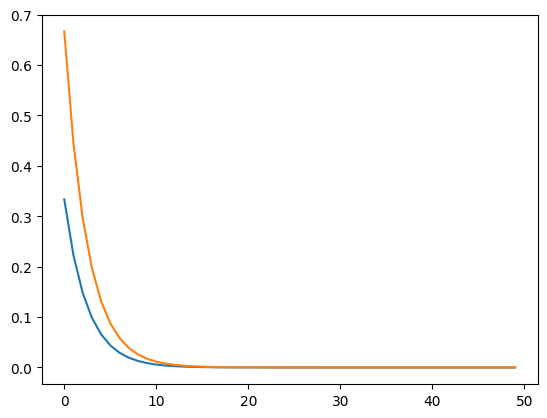

In [15]:
from matplotlib import pyplot as plt
xs,ys = list(range(len(final))),final
plt.plot(xs,ys)
plt.plot(xs,ys2)
plt.show()

In [4]:
import sys
sys.path.append('../')  # Adjust the relative path accordingly

from plot import Plot

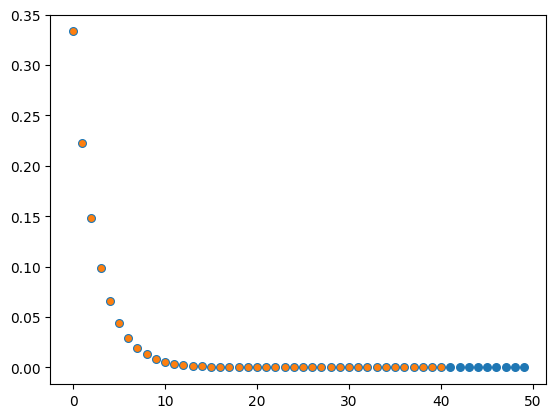

In [25]:
P = Plot()
from matplotlib import pyplot as plt
ρ = λ/μ
xs = list(range(len(final)))
data1 = [(1/3) * (ρ ** i) for i in range(len(final))]
plt.scatter(xs,data1,s=30)
f = [x for x in final if x > 0]
plt.scatter(list(range(len(f))),f,s=15)


^ Blue: expected, Orange: observed

In [3]:
!pip3 install sympy scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 31.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [20]:

p = Plot()
ρ = λ/μ
print(ρ)
p.plotGeneric()

ModuleNotFoundError: No module named 'Plot'

In [19]:
import os
print(os.getcwd())

/Users/dolevartzi/PycharmProjects/probablyprobability/queueing


In [14]:
ys2 = [(2/3)**(i+1) for i in range(50)]
plt.show()

In [5]:
final[:5]

array([0.33343943, 0.22233761, 0.14818014, 0.09876589, 0.06583667])

In [52]:
a = [x for x in a if x > 0]
np.mean(a)

0.7553316317993051

In [ ]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
np.mean(x,axis=0)

##### Dropping System, $k$ servers, $k$ types of jobs
- degenerate case: $k = 1$, $\mu_1 = \mu$
    - dropping system
    - we know from Problem 17.5 that $\pi_n = \frac{\rho}{n} \cdot C$
        - can use as a sanity check

In [ ]:
fun foo bar baz = 

In [ ]:
""" Let's first code up k = 1"""
from random import uniform
from math import log
from tqdm import tqdm
#inter-arrival times I ~ Exp(λ)
#λ, k, p_i
λ = 2
μ = 3
def gen_arrival():
    u = uniform(0,1)
    return -(1/λ)*log(u)

def gen_jobsize():
    u = uniform(0,1)
    return -(1/μ)*log(u)


''' Making transition to dropping system now: 1 server'''
def run():
    pis = [0] * 50
    t = 0
    N = 0
    t_complete = float('inf')
    t_arrive = gen_arrival()
    arrivals = 0
    t_100k = 0
    to_depart = 1
    while True:
        #job completes next
        if t_complete < t_arrive:
            t += t_complete
            pis[N] += t_complete
            N -= 1
            if t_100k:
                to_depart -= 1
            if t_100k and not to_depart:
                # print(t,max(pis))
                # print(t,sum(pis),t_100k)
                return t-t_100k,N,[pi / (t) for pi in pis]
            t_arrive -= t_complete
            t_complete = gen_jobsize() if N > 0 else float('inf')
        #job arrives next
        else:
            t += t_arrive
            pis[N] += t_arrive
            N += 1
            t_complete -= t_arrive
            if N==1 and t_complete == float('inf'):
                t_complete = gen_jobsize()
            t_arrive = gen_arrival()
            arrivals += 1
            if arrivals == 100_000:
                t_100k = t
                to_depart = N
                # print('hey',t,t_100k,N)
ts,Ns = [],[]
n = 1000
pi_true = []
for _ in tqdm(range(n)):
    T,Nf,pis = run()
    # print(f'T = {T}')
    ts.append(T)
    Ns.append(Nf)
    pi_true.append(pis)
    # print(pis)
avg_T, avg_N = sum(ts)/n, sum(Ns)/n
print(f'Average T of 100kth job: {avg_T}')
print(f'Average N at 100kth job: {avg_N}')
print(f'λT: {λ * avg_T}')
import numpy as np
pis = np.array(pi_true)
final = np.mean(pis,axis=0)
print(final)
for i in range(len(final) - 1):
    print(final[i+1]/final[i])
a = [final[i+1] / final[i] for i in range(len(final) - 1)]
a = [x for x in a if x > 0]
print(f'Average Ratio:{np.mean(a)}')
